# Imports

In [1]:
import numpy as np
import pandas as pd
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
from time import time
import seaborn as sns


# Utility Functions and Parallel K-Means Class

In [2]:
# Utility Functions
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def plot_digit(data, title=''):
    plt.figure(figsize=(4, 4))
    plt.imshow(data.reshape(28, 28), cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def visualize_clusters(centroids, k):

    plt.figure(figsize=(2*k, 2))
    for i in range(k):
        plt.subplot(1, k, i+1)
        plt.imshow(centroids[i].reshape(28, 28), cmap='gray')
        plt.title(f'Cluster {i}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Serial Implementation
class SerialKMeans:
    @staticmethod
    def serialReadFile(filename):
        
        # Read CSV file with header, drop the 'label' column if it exists
        df = pd.read_csv(filename)
        if 'label' in df.columns:
            df = df.drop('label', axis=1)
        # Convert all columns to float64
        return df.astype(np.float64)
    
    @staticmethod
    def serialAssign2cluster(x, centroids):
       
        distances = [euclidean_distance(x.astype(np.float64), c) for c in centroids]
        return np.argmin(distances)
    
    @staticmethod
    def serialKMeans(X, K, n_iter):
        
        # Convert data to float if not already
        X = X.astype(np.float64)
        
        # Initialize centroids randomly
        n_features = X.shape[1]
        centroids = np.random.randn(K, n_features)
        
        for iteration in range(n_iter):
            print(f"Iteration {iteration + 1}/{n_iter}")
            
            # Assign points to clusters
            cluster_assignments = np.array([
                SerialKMeans.serialAssign2cluster(x, centroids) 
                for x in X.values
            ])
            
            # Update centroids
            new_centroids = np.zeros_like(centroids)
            for k in range(K):
                if np.sum(cluster_assignments == k) > 0:
                    new_centroids[k] = X.values[cluster_assignments == k].mean(axis=0)
                else:
                    new_centroids[k] = centroids[k]
            
            # Check convergence
            if np.allclose(centroids, new_centroids):
                print(f"Converged after {iteration + 1} iterations")
                break
                
            centroids = new_centroids
            
        return centroids


# Test / Main


Testing Serial Implementation...
Data loaded: Shape = (70000, 784)
Iteration 1/10
Iteration 2/10
Iteration 3/10
Iteration 4/10
Iteration 5/10
Iteration 6/10
Iteration 7/10
Iteration 8/10
Iteration 9/10
Iteration 10/10
Serial execution time: 79.02 seconds

Visualizing Serial Results...


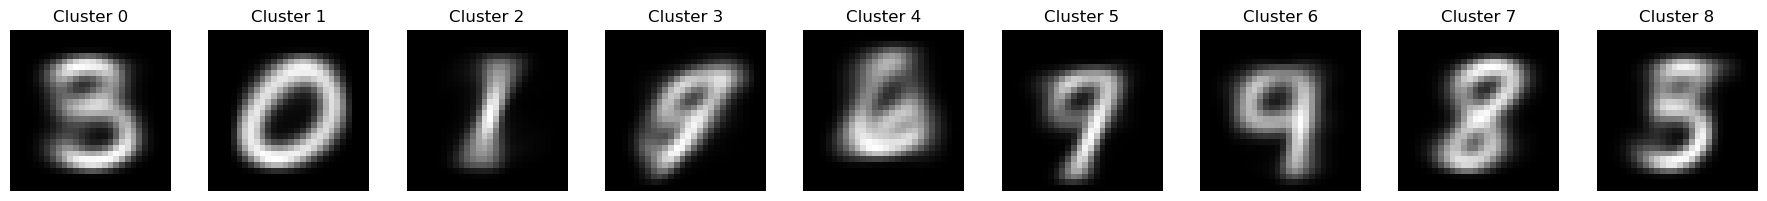

In [3]:
filename = "tot_mnist_shuf.csv" 
print("Testing Serial Implementation...")
# Test serial implementation
X = SerialKMeans.serialReadFile(filename)
print(f"Data loaded: Shape = {X.shape}")
    
start_time = time()
serial_centroids = SerialKMeans.serialKMeans(X, K=9, n_iter=10)
serial_time = time() - start_time
print(f"Serial execution time: {serial_time:.2f} seconds")
    
print("\nVisualizing Serial Results...")
visualize_clusters(serial_centroids, 9)